In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from scipy.interpolate import CubicSpline
from scipy.integrate import quad

In [27]:
class ParametricCubicSpline:
    def __init__(self, t, points, bc_type='natural'):
        self.t = t
        self.points = points
         
        self.bc_type = bc_type
        self.spline_x = CubicSpline(t, points[:, 0], bc_type=bc_type, extrapolate=None)
        self.spline_y = CubicSpline(t, points[:, 1], bc_type=bc_type, extrapolate=None)
        
        self.coefficients_x = self.spline_x.c
        self.coefficients_y = self.spline_y.c

    def evaluate(self, t_val):
        x_val = self.spline_x(t_val)
        y_val = self.spline_y(t_val)
        return x_val, y_val
    
    def arcLength(self):
        # Define the derivative of x(t) and y(t)
        dx_dt = self.spline_x.derivative()
        dy_dt = self.spline_y.derivative()

        # Define the integrand for the arc length calculation
        integrand = lambda t: np.sqrt(dx_dt(t)**2 + dy_dt(t)**2)

        # Calculate the arc length using definite integral
        arc_length, _ = quad(integrand, 0, 1)
        return arc_length

    def objective_function(self, t):
        difference_x = self.spline_x(t) - self.target_x
        difference_y = self.spline_y(t) - self.target_y
        
        return np.sqrt(difference_x**2 + difference_y**2)

    def calculate_arc_length(self, target_x, target_y):
        self.target_x = target_x
        self.target_y = target_y

        # Minimize the objective function to find the optimal parameter value
        result = minimize_scalar(self.objective_function, method='Golden')

        # Extract the optimal parameter value
        optimal_t = result.x

        # Calculate the arc length using definite integral up to the optimal parameter value
        arc_length, _ = quad(lambda t: np.sqrt(self.spline_x.derivative()(t)**2 + self.spline_y.derivative()(t)**2), 0, optimal_t)

        return arc_length

    
# Example usage:
t_values = np.linspace(0, 1, 4)  # Parameter values
control_points = np.array([[0, 0], [1, 3], [2, -1], [3, 2]])  # Control points

parametric_spline = ParametricCubicSpline(t_values, control_points)

In [28]:
t_fine = np.linspace(0, 1, 1000)

coordinates = np.array([parametric_spline.evaluate(t_val) for t_val in t_fine])

for i, coef in enumerate(parametric_spline.coefficients_x):
    print(f"Coefficients for segment {i}: {coef}")
    
for i, coef in enumerate(parametric_spline.coefficients_y):
    print(f"Coefficients for segment {i}: {coef}")

Coefficients for segment 0: [7.99360578e-15 0.00000000e+00 0.00000000e+00]
Coefficients for segment 1: [-2.66453526e-15 -2.66453526e-15  1.33226763e-15]
Coefficients for segment 2: [3. 3. 3.]
Coefficients for segment 3: [0. 1. 2.]
Coefficients for segment 0: [-63. 126. -63.]
Coefficients for segment 1: [  0. -63.  63.]
Coefficients for segment 2: [16. -5. -5.]
Coefficients for segment 3: [ 0.  3. -1.]


In [29]:
from random import randint
from sympy import *

a1,a2,a3,a4,b1,b2,b3,b4,x,y,s,ss,s1,s2,s3 = symbols('a1 a2 a3 a4 b1 b2 b3 b4 x y s s^* stilde_1 stilde_2 stilde_3')

In [30]:
fx = a1*s**3+a2*s**2+a3*s+a4
fy = b1*s**3+b2*s**2+b3*s+b4
D = (fx-x)**2 + (fy-y)**2

D_1 = diff(D,s)
D_2 = diff(D_1,s)

In [31]:
P = ((s - s2)*(s - s3))/((s1 - s2)*(s1 - s3))*D.subs(s, s1)+((s - s1)*(s - s3))/((s2 - s1)*(s2 - s3))*D.subs(s, s2)+((s - s1)*(s - s2))/((s3 - s1)*(s3 - s2))*D.subs(s, s3)
P_1 = diff(P, s)
QP = solve(P_1,s)[0]


In [32]:
d = Function('D')(s)
Ptest = ((s - s2)*(s - s3))/((s1 - s2)*(s1 - s3))*d.subs(s, s1)+((s - s1)*(s - s3))/((s2 - s1)*(s2 - s3))*d.subs(s, s2)+((s - s1)*(s - s2))/((s3 - s1)*(s3 - s2))*d.subs(s, s3)
Ptest_1 = diff(Ptest, s)

testsol = solve(Ptest_1,s)
simplify(testsol[0])

(stilde_1**2*D(stilde_2) - stilde_1**2*D(stilde_3) - stilde_2**2*D(stilde_1) + stilde_2**2*D(stilde_3) + stilde_3**2*D(stilde_1) - stilde_3**2*D(stilde_2))/(2*(stilde_1*D(stilde_2) - stilde_1*D(stilde_3) - stilde_2*D(stilde_1) + stilde_2*D(stilde_3) + stilde_3*D(stilde_1) - stilde_3*D(stilde_2)))

In [33]:
simplify(D)

(a1*s**3 + a2*s**2 + a3*s + a4 - x)**2 + (b1*s**3 + b2*s**2 + b3*s + b4 - y)**2

In [34]:
simplify(D_1)

2*(3*a1*s**2 + 2*a2*s + a3)*(a1*s**3 + a2*s**2 + a3*s + a4 - x) + 2*(3*b1*s**2 + 2*b2*s + b3)*(b1*s**3 + b2*s**2 + b3*s + b4 - y)

In [35]:
simplify(D_2)

4*(3*a1*s + a2)*(a1*s**3 + a2*s**2 + a3*s + a4 - x) + 4*(3*b1*s + b2)*(b1*s**3 + b2*s**2 + b3*s + b4 - y) + 2*(3*a1*s**2 + 2*a2*s + a3)**2 + 2*(3*b1*s**2 + 2*b2*s + b3)**2

In [36]:
def quadratFit(s1, s2, s3, iterationNumber=3):
    
    for i in range(iterationNumber):
        pass
    return 0,0

In [37]:
def newtonMethod(x0, iterationNumber, coeff_values):
    coeff_values['s'] = x0
    res = 2
    
    for i in range(iterationNumber):
        x1 = x0 - D_1.subs(coeff_values) / D_2.subs(coeff_values)
        coeff_values['s']= x1
     
        res = np.abs(x1 - x0)
        if res <= 0.000001:   # Stop when the result is within the desired tolerance
            return x1, res
        
        x0 = x1
    return x0, res


In [38]:
target_point = np.array([0.5, 2])
coeff_values = {a1: 7.99360578e-15, a2: -2.66453526e-15, a3: 3, a4: 0, b1: -63, b2: 0, b3: 16, b4: 0, x: target_point[0], y: target_point[1], s: 0}

In [39]:
L = parametric_spline.arcLength()
l = parametric_spline.calculate_arc_length(1.5,1)

print({f"Length: {L}"}, f"Length to: {l}")

coord_sol = parametric_spline.evaluate(l/L)
print(coord_sol)
#quadraticSol, quadraticRes = quadratFit(1,1,1)

{'Length: 11.025340813425649'} Length to: 5.512670408783198
(array(1.5), array(1.))


In [40]:
newtonSol, newtonRes = newtonMethod(0.2, 100, coeff_values)
coeff_values = {a1: 8, a2: -2.66, a3: 3, a4: 0, b1: -63, b2: 0, b3: 16, b4: 0, x: target_point[0], y: target_point[1], s: newtonSol}
coord_sol = parametric_spline.evaluate(newtonSol)
print(newtonSol, newtonRes, D.subs(coeff_values))

0.136346374491409 7.91138848321715e-8 0.0149096382196098


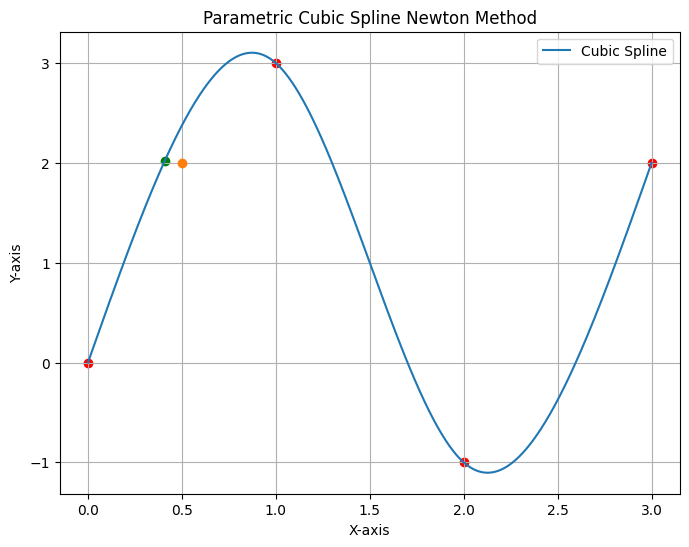

In [41]:
# Plot the original points and the cubic spline
plt.figure(figsize=(8, 6))
plt.plot(coordinates[:,0], coordinates[:,1], label='Cubic Spline')
plt.plot(target_point[0], target_point[1], 'o')
plt.scatter(control_points[:, 0], control_points[:, 1], marker='o', color='red')
plt.scatter(coord_sol[0], coord_sol[1], marker='o', color='green')

plt.title('Parametric Cubic Spline Newton Method')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()